# Sistemas Lineales<a class="tocSkip">
## TRATAMIENTO DE SEÑALES <a class="tocSkip">
### Ingenieria Electrónica <a class="tocSkip">
### Universidad Popular del Cesar <a class="tocSkip">
### Prof.: Jose Ramón Iglesias Gamarra - [https://github.com/joseramoniglesias/](https://github.com/joseramoniglesias/) <a class="tocSkip">
  **joseiglesias@unicesar.edu.co**

# Image restoration, Noise, Segmentation and Contours
> So far, you have done some very cool things with your image processing skills! In this chapter, you will apply image restoration to remove objects, logos, text, or damaged areas in pictures! You will also learn how to apply noise, use segmentation to speed up processing, and find elements in images by their contours. This is the Summary of lecture "Image Processing in Python", via datacamp.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Datacamp, Vision]
- image: images/dice_contours.png

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize'] = (10, 8)

## Image restoration
- Image reconstruction
    - Fixing damaged images
    - Text removing
    - Logo removing
    - Object removing
- Inpainting
    - Reconstructing lost parts of images
    - Looking at the non-damaged regions

### Let's restore a damaged image
In this exercise, we'll restore an image that has missing parts in it, using the `inpaint_biharmonic()` function.

We'll work on an image with damaged. Some of the pixels have been replaced by 1s using a binary mask, on purpose, to simulate a damaged image. Replacing pixels with 1s turns them totally black.

The mask is a black and white image with patches that have the position of the image bits that have been corrupted. We can apply the restoration function on these areas.

Remember that inpainting is the process of reconstructing lost or deteriorated parts of images and videos.


In [2]:
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.title(title)
    plt.axis('off')
    
def plot_comparison(img_original, img_filtered, img_title_filtered):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 8), sharex=True, sharey=True)
    ax1.imshow(img_original, cmap=plt.cm.gray)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(img_filtered, cmap=plt.cm.gray)
    ax2.set_title(img_title_filtered)
    ax2.axis('off')

C:\Users\joser\AppData\Local\Temp\ipykernel_11052\1954943964.py:12: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)


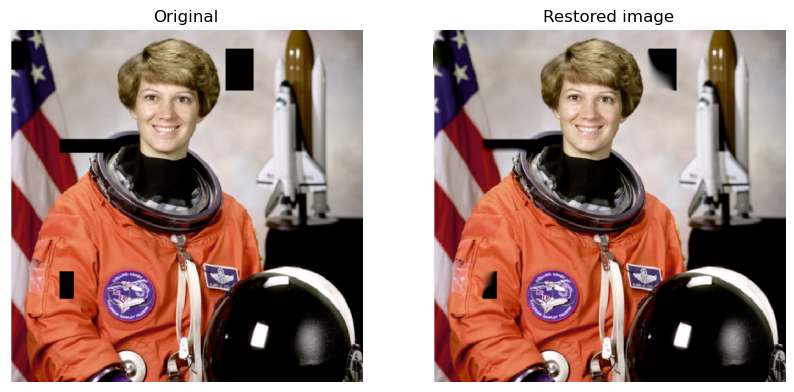

In [7]:
from skimage.restoration import inpaint
from skimage.transform import resize
from skimage import color

defect_image = plt.imread('damaged_astronaut.png')
defect_image = resize(defect_image, (512, 512))
defect_image = color.rgba2rgb(defect_image)

mask = pd.read_csv('astronaut_mask.csv').to_numpy()

# Apply the restoration function to the image using the mask
restored_image = inpaint.inpaint_biharmonic(defect_image, mask, multichannel=True)

# Show ther defective image
plot_comparison(defect_image, restored_image, 'Restored image')

### Removing logos
As we saw in the video, another use of image restoration is removing objects from an scene. In this exercise, we'll remove the Datacamp logo from an image.

You will create and set the mask to be able to erase the logo by inpainting this area.

Remember that when you want to remove an object from an image you can either manually delineate that object or run some image analysis algorithm to find it.

C:\Users\joser\AppData\Local\Temp\ipykernel_11052\23073739.py:10: FutureWarning: `multichannel` is a deprecated argument name for `inpaint_biharmonic`. It will be removed in version 1.0. Please use `channel_axis` instead.
  image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,


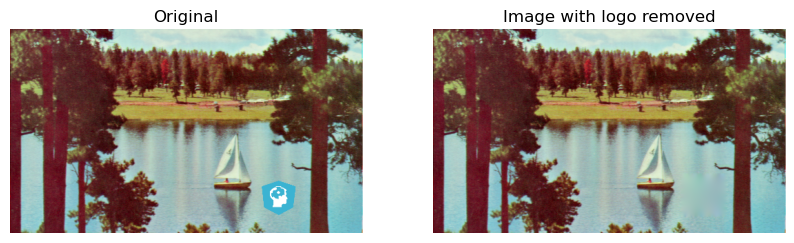

In [8]:
image_with_logo = plt.imread('4.2.06_w_logo_2_2.png')

# Initialize the mask
mask = np.zeros(image_with_logo.shape[:-1])

# Set the pixels where the logo is to 1
mask[210:272, 360:425] = 1

# Apply inpainting to remove the logo
image_logo_removed = inpaint.inpaint_biharmonic(image_with_logo,
                                                mask,
                                                multichannel=True)

# Show the original and logo removed images
plot_comparison(image_with_logo, image_logo_removed, 'Image with logo removed')

## Noise
- Denoising types
    - Total variation (TV)
    - Bilateral 
    - Wavelet denoising
    - Non-local means denoising

### Let's make some noise!
In this exercise, we'll practice adding noise to a fruit image.



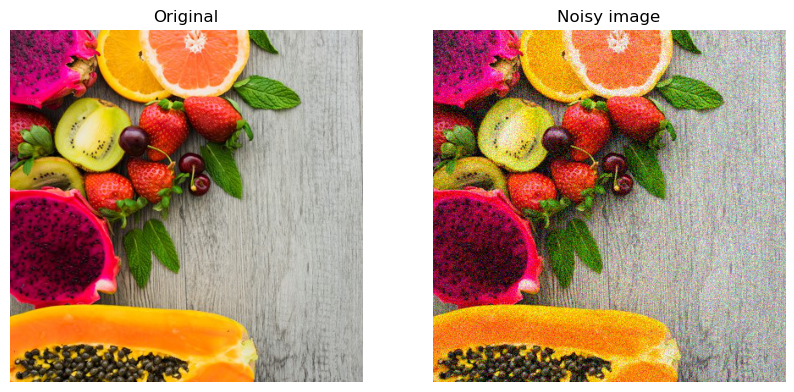

In [9]:
from skimage.util import random_noise

fruit_image = plt.imread('fruits_square.jpg')

# Add noise to the image
noisy_image = random_noise(fruit_image)

# Show th original and resulting image
plot_comparison(fruit_image, noisy_image, 'Noisy image')

### Reducing noise
We have a noisy image that we want to improve by removing the noise in it.

Use total variation filter denoising to accomplish this.



C:\Users\joser\AppData\Local\Temp\ipykernel_11052\2499487875.py:6: FutureWarning: `multichannel` is a deprecated argument name for `denoise_tv_chambolle`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_tv_chambolle(noisy_image, multichannel=True)


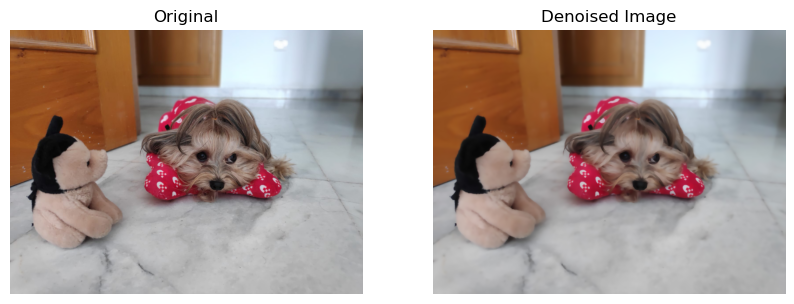

In [10]:
from skimage.restoration import denoise_tv_chambolle

noisy_image = plt.imread('miny.jpeg')

# Apply total variation filter denoising
denoised_image = denoise_tv_chambolle(noisy_image, multichannel=True)

# Show the noisy and denoised image
plot_comparison(noisy_image, denoised_image, 'Denoised Image')

### Reducing noise while preserving edges
In this exercise, you will reduce the noise in this landscape picture.

Since we prefer to preserve the edges in the image, we'll use the bilateral denoising filter.



C:\Users\joser\AppData\Local\Temp\ipykernel_11052\787580268.py:6: FutureWarning: `multichannel` is a deprecated argument name for `denoise_bilateral`. It will be removed in version 1.0. Please use `channel_axis` instead.
  denoised_image = denoise_bilateral(landscape_image, multichannel=True)


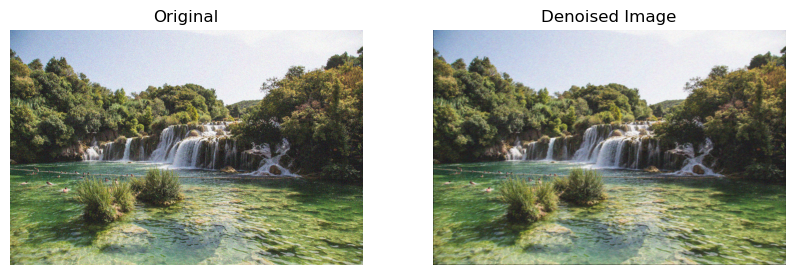

In [11]:
from skimage.restoration import denoise_bilateral

landscape_image = plt.imread('noise-noisy-nature.jpg')

# Apply bilateral filter denoising
denoised_image = denoise_bilateral(landscape_image, multichannel=True)

# Show original and resulting images
plot_comparison(landscape_image, denoised_image, 'Denoised Image')

## Superpixels & segmentation
- Superpixel
    - A group of connected pixels with similar colors or gray levels
    - Benefits
        - meaningful regions
        - Confutational efficiency
- Segmentation
    - supervised
    - unsupervised
        - Simple Linear Iterative Clustering (CLIC): takes all the pixel values of the image and tries to separate them into a predifined number of sub-regions
        

### Superpixel segmentation
In this exercise, you will apply unsupervised segmentation to the same image, before it's passed to a face detection machine learning model.

So you will reduce this image from 265×191=50,615 pixels down to 400 regions.



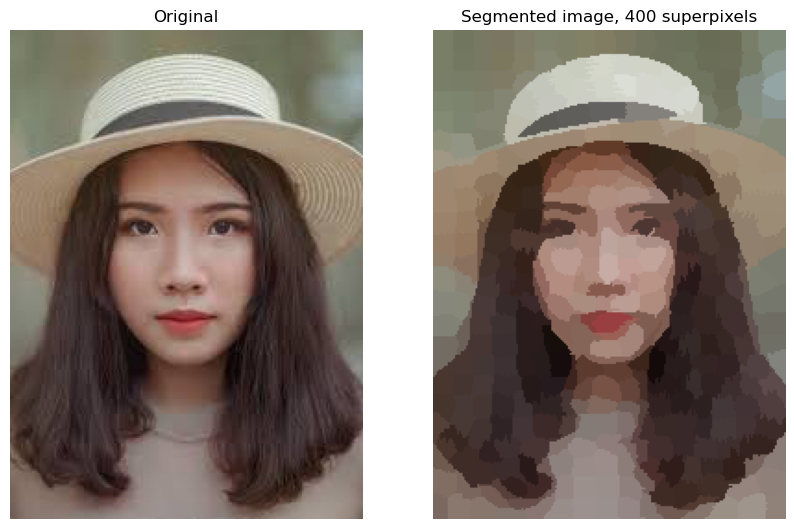

In [12]:
from skimage.segmentation import slic
from skimage.color import label2rgb

face_image = plt.imread('chinese.jpg')

# Obtain the segmentation with 400 regions
segments = slic(face_image, n_segments=400)

# Put segments on top of original image to compare
segmented_image = label2rgb(segments, face_image, kind='avg')

# Show the segmented image
plot_comparison(face_image, segmented_image, 'Segmented image, 400 superpixels')

## Finding contours


### Contouring shapes
In this exercise we'll find the contour of a horse.

For that we will make use of a binarized image provided by scikit-image in its data module. Binarized images are easier to process when finding contours with this algorithm. Remember that contour finding only supports 2D image arrays.

Once the contour is detected, we will display it together with the original image. That way we can check if our analysis was correct!



In [8]:
def show_image_contour(image, contours):
    plt.figure()
    for n, contour in enumerate(contours):
        plt.plot(contour[:, 1], contour[:, 0], linewidth=3)
    plt.imshow(image, interpolation='nearest', cmap='gray_r')
    plt.title('Contours')
    plt.axis('off')

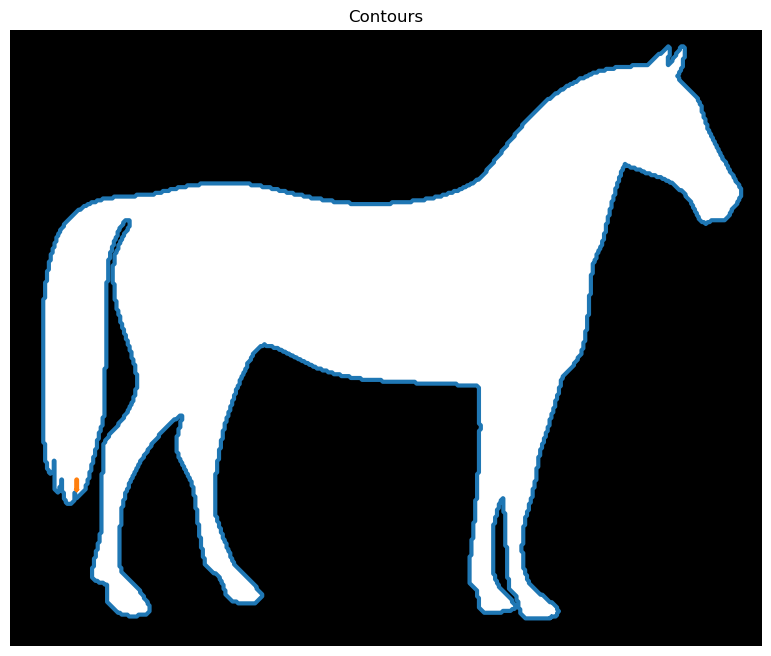

In [9]:
from skimage import measure, data

# Obtain the horse image
horse_image = data.horse()

# Find the contours with a constant level value of 0.8
contours = measure.find_contours(horse_image, level=0.8)

# Shows the image with contours found
show_image_contour(horse_image, contours)

### Find contours of an image that is not binary
Let's work a bit more on how to prepare an image to be able to find its contours and extract information from it.

We'll process an image of two purple dices loaded as image_dices and determine what number was rolled for each dice.

![dice](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/dataset/dices.png?raw=1)

In this case, the image is not grayscale or binary yet. This means we need to perform some image pre-processing steps before looking for the contours. First, we'll transform the image to a 2D array grayscale image and next apply thresholding. Finally, the contours are displayed together with the original image.

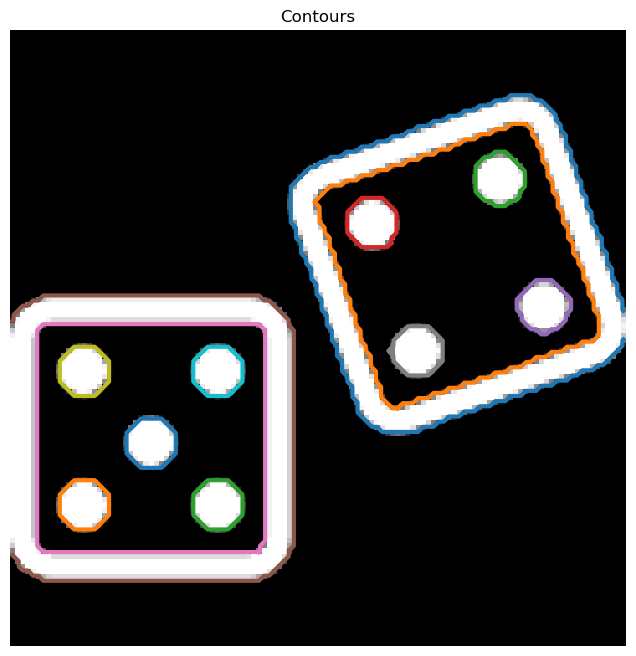

In [10]:
from skimage.io import imread
from skimage.filters import threshold_otsu

image_dices = imread('dices.png',as_gray = True)

# Make the image grayscale
#image_dices = color.rgb2gray(image_dices)

# Obtain the optimal thresh value
thresh = threshold_otsu(image_dices)

# Apply thresholding
binary = image_dices > thresh

# Find contours at a constant value of 0.8
contours = skimage.measure.find_contours(binary, level=0.8)

# Show the image
show_image_contour(image_dices, contours)

### Count the dots in a dice's image
Now we have found the contours, we can extract information from it.

In the previous exercise, we prepared a purple dices image to find its contours:

![step](https://github.com/goodboychan/chans_jupyter/blob/main/_notebooks/dataset/steps_contours.png?raw=1)

This time we'll determine what number was rolled for the dice, by counting the dots in the image.

Create a list with all contour's shapes as shape_contours. You can see all the contours shapes by calling shape_contours in the console, once you have created it.

Check that most of the contours aren't bigger in size than 50. If you count them, they are the exact number of dots in the image.

Dice`s dots number: 9.


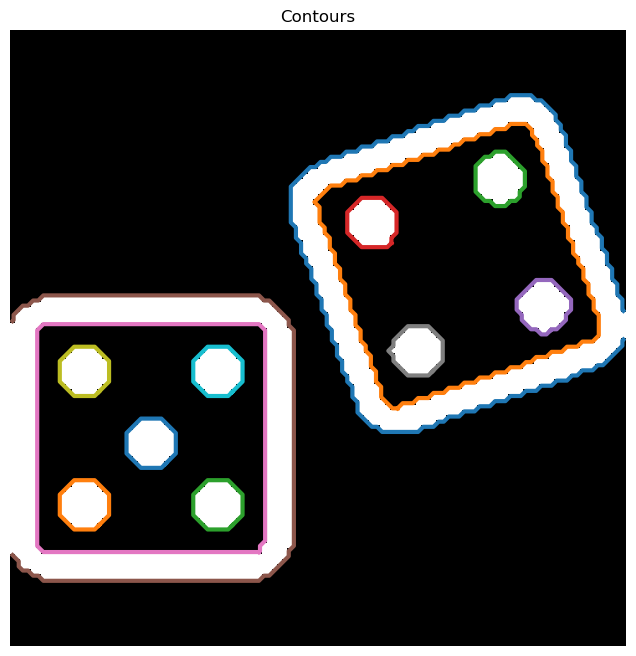

In [11]:
# Create list with the shape of each contour
shape_contours = [cnt.shape[0] for cnt in contours]

# Set 50 as the maximum size of the dots shape
max_dots_shape = 50

# Count dots in contours excluding bigger than dots size
dots_contours = [cnt for cnt in contours if np.shape(cnt)[0] < max_dots_shape]

# Shows all contours found
show_image_contour(binary, contours)

# Print the dice's number
print('Dice`s dots number: {}.'.format(len(dots_contours)))

**Copyright**

The notebooks are provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources). Feel free to use the notebooks for your own educational purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT).